```
Generative AI with Python, by Fernando Amaral
```

# Setup

In [23]:
# gpu
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
import matplotlib.pyplot as plt
import tensorflow_hub as hub
import requests

# Optional: ImageNet Labels

In [24]:

LABELS_URL = 'https://storage.googleapis.com/download.tensorflow.org/data/ImageNetLabels.txt'
response = requests.get(LABELS_URL)
labels = response.text.split('\n')[1:-1]
for index in range(100, 250):
    print(f"Label for index {index} is {labels[index]}")


Label for index 100 is black swan
Label for index 101 is tusker
Label for index 102 is echidna
Label for index 103 is platypus
Label for index 104 is wallaby
Label for index 105 is koala
Label for index 106 is wombat
Label for index 107 is jellyfish
Label for index 108 is sea anemone
Label for index 109 is brain coral
Label for index 110 is flatworm
Label for index 111 is nematode
Label for index 112 is conch
Label for index 113 is snail
Label for index 114 is slug
Label for index 115 is sea slug
Label for index 116 is chiton
Label for index 117 is chambered nautilus
Label for index 118 is Dungeness crab
Label for index 119 is rock crab
Label for index 120 is fiddler crab
Label for index 121 is king crab
Label for index 122 is American lobster
Label for index 123 is spiny lobster
Label for index 124 is crayfish
Label for index 125 is hermit crab
Label for index 126 is isopod
Label for index 127 is white stork
Label for index 128 is black stork
Label for index 129 is spoonbill
Label for

# Diagram

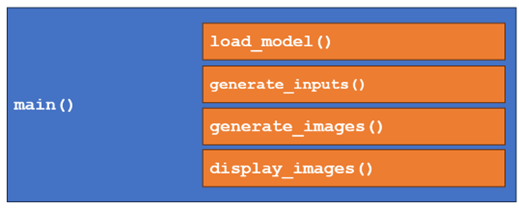

# Code

In [31]:
def load_model():
    return hub.KerasLayer('https://tfhub.dev/deepmind/biggan-deep-128/1',input_shape=[], dtype=tf.string)

In [32]:
def generate_inputs(batch_size=4, truncation=0.5):
    z = truncation * tf.random.truncated_normal([batch_size, 128])
    y_index = tf.constant([105] * batch_size)
    y = tf.one_hot(y_index, 1000)
    return y, z

In [33]:
def generate_images(module, y, z, truncation=0.5):
    inputs = dict(y=y, z=z, truncation=truncation)
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        images = sess.run(module(inputs))
    return images

In [34]:
def display_images(images, batch_size=4):
    plt.figure(figsize=(15, 15))
    for i, image in enumerate(images):
        plt.subplot(1, batch_size, i + 1)
        plt.imshow((image + 1) / 2.0)
        plt.axis('off')
    plt.show()


In [35]:
def main():
    tf.disable_v2_behavior()
    module = load_model()
    y, z = generate_inputs()
    images = generate_images(module, y, z)
    display_images(images)

# Execution

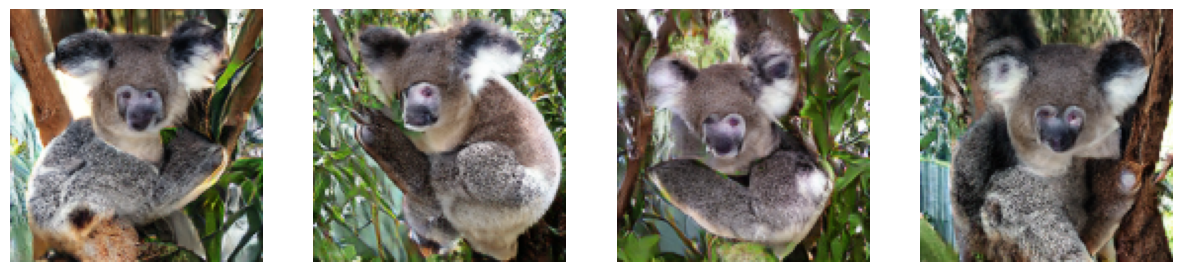

In [36]:
main()